In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

tf.__version__

'1.14.0-rc1'

In [0]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
df_train = pd.read_csv('./gdrive/My Drive/SIGN_LANGUAGE/sign_mnist_train.csv')
df_test = pd.read_csv('./gdrive/My Drive/SIGN_LANGUAGE/sign_mnist_test.csv')

In [0]:
df_train.shape, df_test.shape

((27455, 785), (7172, 785))

In [0]:
np.sort(df_train['label'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [0]:
x_train, y_train = df_train.drop(columns='label').values, df_train['label'].values
x_test, y_test = df_test.drop(columns='label').values, df_test['label'].values

In [0]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

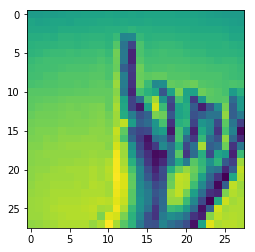

8


In [0]:
i = 6
plt.figure(1)
plt.imshow(x_train[i].reshape(28, 28))
plt.show()
print(y_train[i])

In [0]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.Dense(25, activation = 'softmax'))

W0623 14:31:59.591663 139920542091136 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=128)

Train on 27455 samples, validate on 7172 samples
Epoch 1/50
27455/27455 [==============================] - 39s 1ms/sample - loss: 2.1429 - acc: 0.3342 - val_loss: 1.0423 - val_acc: 0.6654
Epoch 2/50
27455/27455 [==============================] - 39s 1ms/sample - loss: 0.7298 - acc: 0.7529 - val_loss: 0.6146 - val_acc: 0.7846
Epoch 3/50
27455/27455 [==============================] - 39s 1ms/sample - loss: 0.3731 - acc: 0.8748 - val_loss: 0.4891 - val_acc: 0.8360
Epoch 4/50
27455/27455 [==============================] - 39s 1ms/sample - loss: 0.2153 - acc: 0.9276 - val_loss: 0.3668 - val_acc: 0.8726
Epoch 5/50
27455/27455 [==============================] - 39s 1ms/sample - loss: 0.1223 - acc: 0.9625 - val_loss: 0.3496 - val_acc: 0.8834
Epoch 6/50
27455/27455 [==============================] - 39s 1ms/sample - loss: 0.0810 - acc: 0.9763 - val_loss: 0.3730 - val_acc: 0.8907
Epoch 7/50
27455/27455 [==============================] - 39s 1ms/sample - loss: 0.0522 - acc: 0.9867 - val_loss: 0.3

[[1.0731225e-03 6.0782428e-13 2.4302541e-10 1.0623852e-08 7.1995226e-15
  8.0339277e-12 8.0342013e-03 1.0658031e-02 1.3237746e-08 1.6727848e-09
  3.9195436e-01 7.9251620e-08 5.2463190e-07 8.4341001e-03 9.4073105e-09
  1.0903726e-04 9.9980525e-06 2.0678115e-05 1.5241235e-04 2.1811319e-09
  3.3825728e-10 8.8067678e-11 2.8624303e-14 2.1422490e-08 5.7955337e-01]]
Y


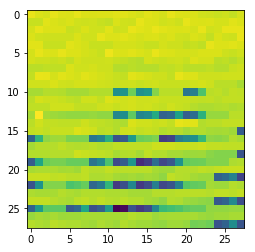

In [0]:
import cv2

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# img = cv2.imread('./drive/My Drive/bdann prj/X.jpg',0)

x=5

image = cv2.imread('./drive/My Drive/Alphabets(Advik)/' + str(class_names[x]) + '.jpg')

#gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#img = thresh

plt.imshow(image)
# img = adjust_gamma(img,0.6)
img = cv2.resize(image,(28, 28))
img = np.resize(img, (1, 28, 28, 1))
img = img/255.0
plt.imshow(img.reshape(28, 28))
predicted = model.predict(img)
print(predicted)
print(class_names[np.argmax(predicted)])

In [0]:
from PIL import Image

[[6.27551591e-15 1.12361488e-16 4.67974062e-11 2.69839376e-01
  5.29396957e-18 9.77934608e-11 6.64958596e-01 1.66604647e-11
  1.76685408e-13 7.68940744e-11 5.20541593e-02 3.29760397e-08
  4.50461890e-11 1.07371931e-10 3.84373125e-05 1.03651425e-02
  6.88412494e-10 6.57215656e-04 3.62128780e-08 1.32560265e-11
  2.90530267e-10 2.94836244e-08 1.01978267e-15 2.08701799e-03
  1.99263361e-09]]
G


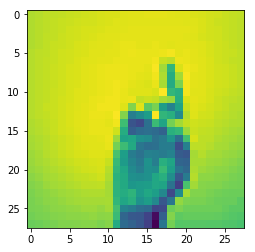

In [0]:
img = Image.open('./drive/My Drive/bdann prj/D.jpg').convert('L')
img = img.resize((28, 28), Image.ANTIALIAS)
img = np.array(img)
img = img.reshape((1, 28, 28, 1))
img = img/255.0
plt.imshow(img.reshape(28, 28))
predicted = model.predict(img)
print(predicted)
print(class_names[np.argmax(predicted)])

In [0]:
class_names = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

count1=count2=0

for x in range(len(class_names)):
  print(class_names[x])
  try:
    img = Image.open('./drive/My Drive/Alphabets(Advik)/' + str(class_names[x]) + '.jpg').convert('L')
    img = img.rotate(-90)
    img = img.resize((28, 28), Image.ANTIALIAS)
    plt.imshow(img)
    img = np.array(img)
    img = img.reshape((1, 28, 28, 1))
    img = img/255.0
    #plt.imshow(img.reshape(200, 200))
    predicted = model.predict(img)
    # print(predicted)
    print(class_names[np.argmax(predicted)])
    predicted = predicted.reshape((class_names.shape[0]))
    predicted.shape, class_names.shape
    plt.figure()
    plt.bar(class_names, predicted)
    plt.show()
    if class_names[x] != class_names[np.argmax(predicted)]:
      count1 += 1
    else:
      count2 += 1
  except:
    print('error')